In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Steps to be taken

In [5]:
# Data Clearning
# Performing EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvement (if any)
# front End
# Deploy

### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# take away - too little data in unnamed columns 2,3,4

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
3839,ham,HEY MATE! HOWS U HONEY?DID U AVE GOOD HOLIDAY?...
174,ham,"Well, i'm gonna finish my bath now. Have a goo..."
5147,spam,Get your garden ready for summer with a FREE s...
3708,ham,Ok.ok ok..then..whats ur todays plan
4919,ham,"G says you never answer your texts, confirm/deny"


In [9]:
# renaming columns 
df.rename(columns = {'v1' : 'target', 'v2': 'text'}, inplace= True)

In [10]:
df.sample(5)

,target,text
4896,ham,I cant pick the phone right now. Pls send a me...
3189,ham,Hi neva worry bout da truth coz the truth will...
5319,ham,Kothi print out marandratha.
775,ham,Thanks for picking up the trash.
2670,ham,Yes. They replied my mail. I'm going to the ma...


In [11]:
# transforming target column 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head() # ham = 0 and smap = 1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# check for missing value

df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep = 'first')

In [17]:
df.duplicated().sum()

0

In [18]:
# check for current shape
df.shape

(5169, 2)

## EDA

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

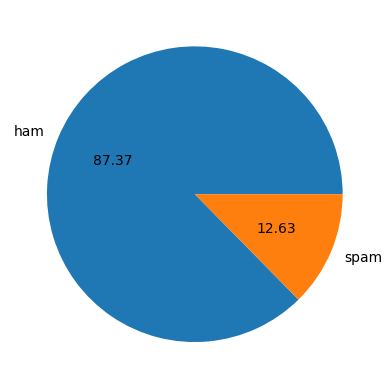

In [20]:
# visualizing the value caounts

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

data is imbalanced

In [21]:
df['num_characters'] = df['text'].apply(len)


In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
import nltk

In [24]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
# check stats

df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target'] == 1]

,target,text,num_characters,num_words,num_sentences
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1


In [30]:
# stats with ham

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# stats with spam

df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Let's visualize

In [32]:
import seaborn as sns

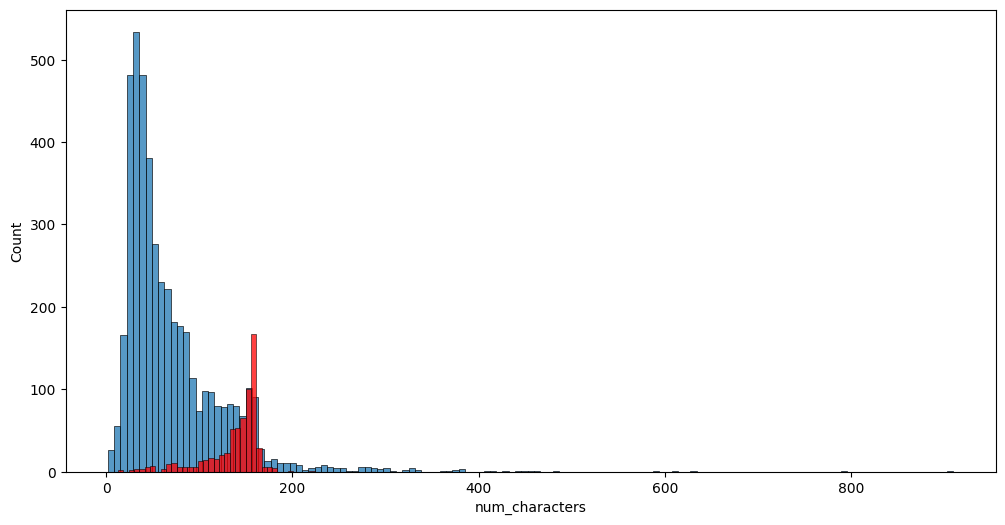

In [33]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')
plt.show()

takeaway - 

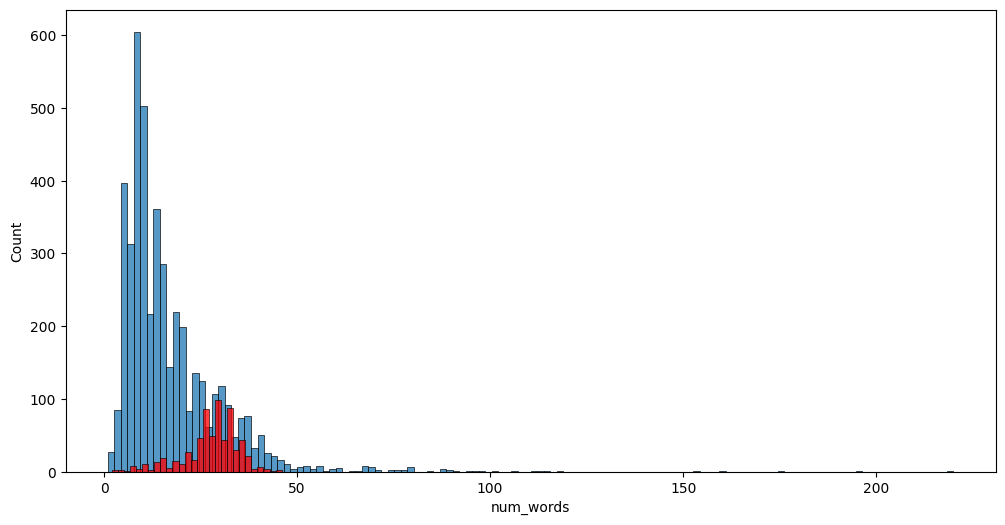

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

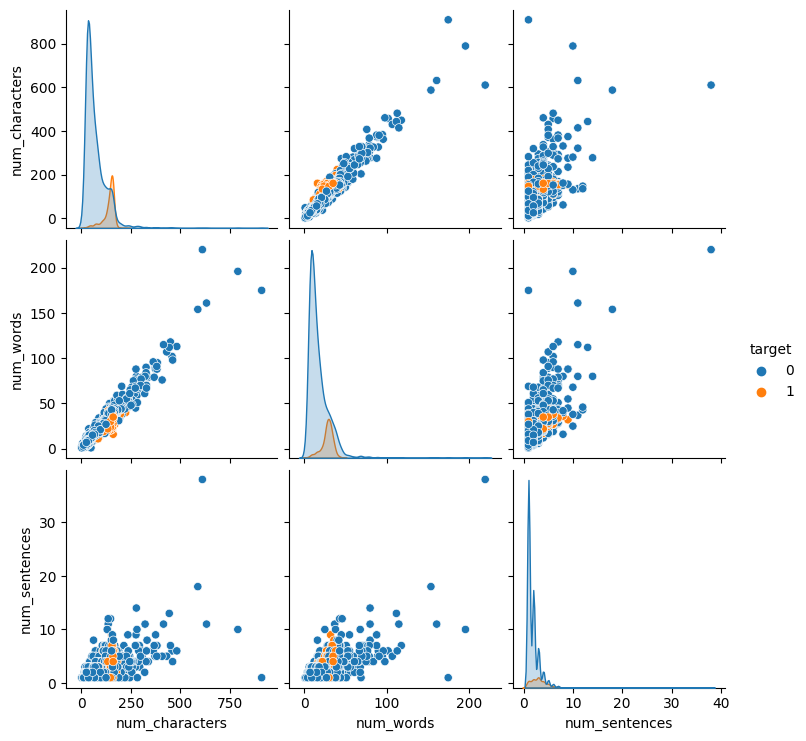

In [35]:
sns.pairplot(df,hue='target')

C:\Users\SANJEEV\AppData\Local\Temp\ipykernel_5912\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

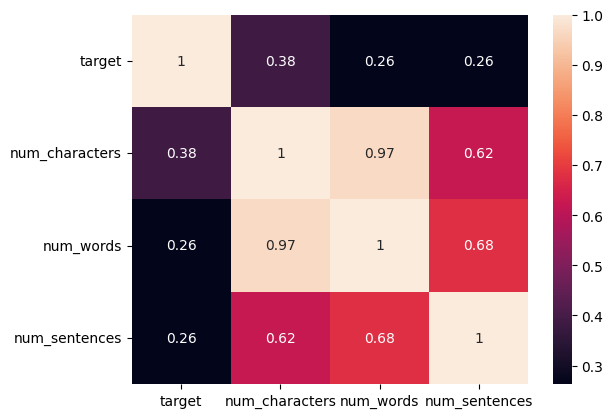

In [36]:
sns.heatmap(df.corr(), annot = True)

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## Data Preprocessing

* Lower Case
* Tokenization
* Removing special characters
* Removing Stopwords and ponctuation
* Stemming

In [38]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
ps.stem('loving')

'love'

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

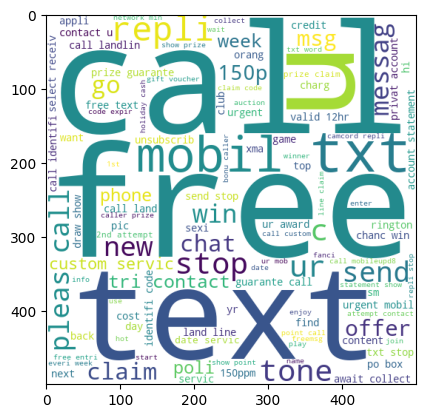

In [48]:
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

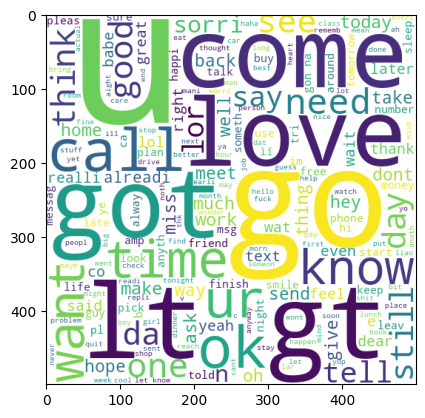

In [50]:
plt.imshow(ham_wc)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
# transforming the string into a list of spam messages

spam_corpus = []
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

9939

In [54]:
from collections import Counter

# Create a DataFrame with the most common 20 words and their counts
word_counts = Counter(spam_corpus).most_common(20)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

In [55]:
df_word_counts

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


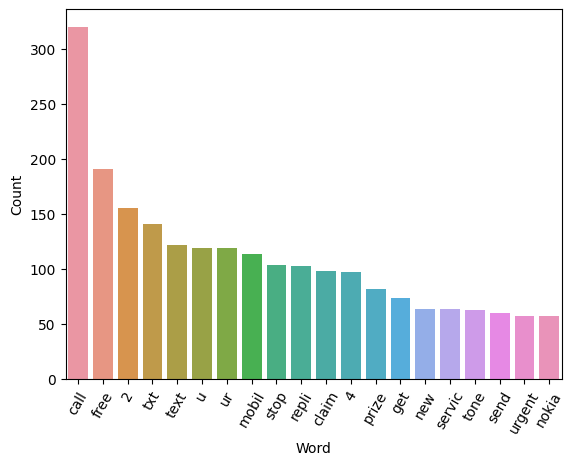

In [56]:
# Lets visualise the most common 20 words from spam corpus

# Plot the barplot using the DataFrame
sns.barplot(data=df_word_counts, x='Word', y='Count')
plt.xticks(rotation=60)  
plt.show()

In [57]:
# transforming the string into a list of ham messages

ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

In [59]:
# Create a DataFrame with the most common 20 words and their counts
word_counts = Counter(ham_corpus).most_common(20)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

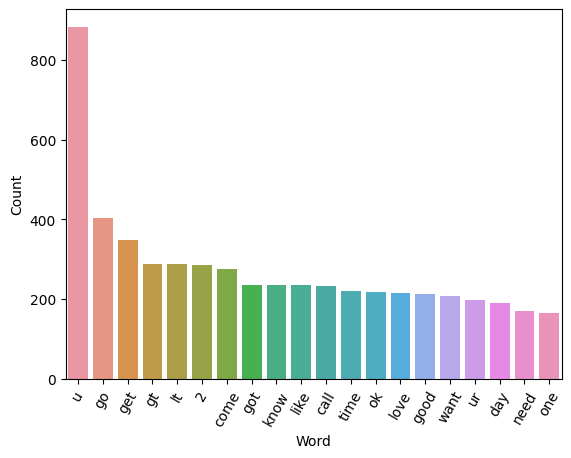

In [60]:
# Lets visualise the most common 20 words from ham corpus

# Plot the barplot using the DataFrame
sns.barplot(data=df_word_counts, x='Word', y='Count')
plt.xticks(rotation=60)  
plt.show()

## Model Building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [62]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [63]:
X.shape

(5169, 6708)

In [64]:
y = df['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred1))
print("Confusion Metrics: ", confusion_matrix(y_test, y_pred1))
print("Pricision Score: ", precision_score(y_test, y_pred1))
print("Recall_score: ", recall_score(y_test, y_pred1))
print("F1_score: ", f1_score(y_test, y_pred1))

Accuracy Score:  0.8800773694390716
Confusion Metrics:  [[792 104]
 [ 20 118]]
Pricision Score:  0.5315315315315315
Recall_score:  0.855072463768116
F1_score:  0.6555555555555556


In [71]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))
print("Confusion Metrics: ", confusion_matrix(y_test, y_pred2))
print("Pricision Score: ", precision_score(y_test, y_pred2))
print("Recall_score: ", recall_score(y_test, y_pred2))
print("F1_score: ", f1_score(y_test, y_pred2))

Accuracy Score:  0.9642166344294004
Confusion Metrics:  [[871  25]
 [ 12 126]]
Pricision Score:  0.8344370860927153
Recall_score:  0.9130434782608695
F1_score:  0.8719723183391004


In [72]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred3))
print("Confusion Metrics: ", confusion_matrix(y_test, y_pred3))
print("Pricision Score: ", precision_score(y_test, y_pred3))
print("Recall_score: ", recall_score(y_test, y_pred3))
print("F1_score: ", f1_score(y_test, y_pred3))

Accuracy Score:  0.9700193423597679
Confusion Metrics:  [[893   3]
 [ 28 110]]
Pricision Score:  0.9734513274336283
Recall_score:  0.7971014492753623
F1_score:  0.8764940239043825


### Let's try tfidf vectorizer for the same

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [74]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [76]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred1))
print("Confusion Metrics: ", confusion_matrix(y_test, y_pred1))
print("Pricision Score: ", precision_score(y_test, y_pred1))
print("Recall_score: ", recall_score(y_test, y_pred1))
print("F1_score: ", f1_score(y_test, y_pred1))

Accuracy Score:  0.8762088974854932
Confusion Metrics:  [[793 103]
 [ 25 113]]
Pricision Score:  0.5231481481481481
Recall_score:  0.8188405797101449
F1_score:  0.6384180790960452


In [77]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))
print("Confusion Metrics: ", confusion_matrix(y_test, y_pred2))
print("Pricision Score: ", precision_score(y_test, y_pred2))
print("Recall_score: ", recall_score(y_test, y_pred2))
print("F1_score: ", f1_score(y_test, y_pred2))

Accuracy Score:  0.9593810444874274
Confusion Metrics:  [[896   0]
 [ 42  96]]
Pricision Score:  1.0
Recall_score:  0.6956521739130435
F1_score:  0.8205128205128205


In [78]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred3))
print("Confusion Metrics: ", confusion_matrix(y_test, y_pred3))
print("Pricision Score: ", precision_score(y_test, y_pred3))
print("Recall_score: ", recall_score(y_test, y_pred3))
print("F1_score: ", f1_score(y_test, y_pred3))

Accuracy Score:  0.9700193423597679
Confusion Metrics:  [[893   3]
 [ 28 110]]
Pricision Score:  0.9734513274336283
Recall_score:  0.7971014492753623
F1_score:  0.8764940239043825


take away : tfidf --> mnb # Since data is imbalanced therefore precision score matters more than accuracy score

## Let's see how other ML algos performs 

In [79]:
# import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [80]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [81]:
# make a dict 
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'MNB' : mnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'ABC' : abc,
    'BGC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb
}

In [82]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [83]:
# testing the function on SVC
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [84]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Pricison - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9516441005802708
Pricison -  0.94
For  SVC
Accuracy -  0.9729206963249516
Pricison -  0.9741379310344828
For  MNB
Accuracy -  0.9593810444874274
Pricison -  1.0
For  DT
Accuracy -  0.9342359767891683
Pricison -  0.8301886792452831
For  KN
Accuracy -  0.9003868471953579
Pricison -  1.0
For  RF
Accuracy -  0.971953578336557
Pricison -  1.0
For  ABC
Accuracy -  0.9613152804642167
Pricison -  0.9454545454545454
For  BGC
Accuracy -  0.9584139264990329
Pricison -  0.8625954198473282
For  ETC
Accuracy -  0.97678916827853
Pricison -  0.975
For  GBDT
Accuracy -  0.9526112185686654
Pricison -  0.9238095238095239
For  XGB
Accuracy -  0.9700193423597679
Pricison -  0.9349593495934959


In [85]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})
performance_df = performance_df.sort_values(by=['Precision', 'Accuracy'], ascending=False)

In [86]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.971954,1.000000
2,MNB,0.959381,1.000000
4,KN,0.900387,1.000000
8,ETC,0.976789,0.975000
1,SVC,0.972921,0.974138
6,ABC,0.961315,0.945455
0,LR,0.951644,0.940000
10,XGB,0.970019,0.934959
9,GBDT,0.952611,0.923810
7,BGC,0.958414,0.862595


## Improvement on model
### Change the max_features parameters of Tfidf

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_3000 = TfidfVectorizer(max_features =3000)

In [88]:
X = tfidf_3000.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [90]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [91]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Pricison - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9584139264990329
Pricison -  0.9702970297029703
For  SVC
Accuracy -  0.9758220502901354
Pricison -  0.9747899159663865
For  MNB
Accuracy -  0.9709864603481625
Pricison -  1.0
For  DT
Accuracy -  0.9294003868471954
Pricison -  0.8282828282828283
For  KN
Accuracy -  0.9052224371373307
Pricison -  1.0
For  RF
Accuracy -  0.9758220502901354
Pricison -  0.9829059829059829
For  ABC
Accuracy -  0.960348162475822
Pricison -  0.9292035398230089
For  BGC
Accuracy -  0.9584139264990329
Pricison -  0.8682170542635659
For  ETC
Accuracy -  0.97678916827853
Pricison -  0.975
For  GBDT
Accuracy -  0.9468085106382979
Pricison -  0.9191919191919192
For  XGB
Accuracy -  0.9671179883945842
Pricison -  0.9333333333333333


In [92]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_MaxFt3000': accuracy_scores, 'Precision_MaxFt3000': precision_scores})

In [93]:
performance_df.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_MaxFt3000,Precision_MaxFt3000
0,RF,0.971954,1.000000,0.975822,0.982906
1,MNB,0.959381,1.000000,0.970986,1.000000
2,KN,0.900387,1.000000,0.905222,1.000000
3,ETC,0.976789,0.975000,0.976789,0.975000
4,SVC,0.972921,0.974138,0.975822,0.974790
5,ABC,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,XGB,0.970019,0.934959,0.967118,0.933333
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BGC,0.958414,0.862595,0.958414,0.868217


### Let's try voting classifier

In [94]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability = True)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(random_state=2)

from sklearn.ensemble import VotingClassifier

In [95]:
voting = VotingClassifier(estimators = [('svm', svc), ('mnb', mnb), ('rf', rfc)], voting = 'soft')

In [96]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [97]:
y_pred_vot = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred_vot))
print("Precision", precision_score(y_test, y_pred_vot))

Accuracy 0.9777562862669246
Precision 0.9831932773109243


Take away : mnb with max feature 3000 still perform better than voting classifier

# Let's apply stacking

In [98]:
estimators = [('svm', svc), ('mnb', mnb), ('rf', rfc)]
final_estimators = ExtraTreesClassifier()

In [99]:
from sklearn.ensemble import StackingClassifier

In [100]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimators)

In [101]:
clf.fit(X_train, y_train)
y_pred_stack = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred_stack))
print("Precision", precision_score(y_test, y_pred_stack))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


take away : precision score has decreased \
Since precision is more important here we will stick to tfidf with 3000 features with MNB

## Let's do a final test before saving our model

In [103]:
X.shape

(5169, 3000)

In [102]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred_mnb))
print("Precision", precision_score(y_test, y_pred_mnb))

Accuracy 0.9709864603481625
Precision 1.0


### Saving our model

In [104]:
import pickle
pickle.dump(tfidf_3000, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))